## Import Libraries
The following Python libraries are imported to support data analysis, visualization, and machine learning tasks.


In [1]:
import seaborn as sns  # For advanced and attractive data visualizations built on top of matplotlib
import pandas as pd  # For data manipulation and analysis using DataFrames
import matplotlib.pyplot as plt  # For creating static visualizations and plotting
from sklearn.preprocessing import LabelEncoder  # To encode categorical labels into numerical format
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # Decision tree model for classification and visualization
from sklearn.metrics import classification_report, confusion_matrix  # For evaluating model performance
from sklearn.metrics import accuracy_score  # To calculate model accuracy
import graphviz  # For rendering decision tree diagrams
from IPython.display import display  # To display visual outputs in Jupyter notebooks
import matplotlib.pyplot as plt  # For creating static visualizations


## Loading and Cleaning Data
The `pandas` library is used to load and preprocess data from a CSV file. The data is read into a DataFrame, and any rows containing missing values are removed using `dropna()`. A preview of the cleaned dataset is then displayed.

In [2]:
#Read CSV file
df = pd.read_csv("3_Car_Evaluation.csv")
df.dropna(inplace=True) # remove missed data
#show the data
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Code for Encoding Categorical Features in the "Car Evaluation" Dataset

The following code uses **`LabelEncoder`** to encode categorical columns in the "Car Evaluation" dataset into numerical values. This is necessary to transform categorical data (such as `buying`, `maint`, `lug_boot`, ...) into numerical data that can be used in machine learning models.

1. **Initializing `LabelEncoder` Objects**:
   - We create `LabelEncoder` objects for each categorical column in the dataset.
   - Each `LabelEncoder` learns how to map categorical values to corresponding numerical values.

2. **Applying `LabelEncoder` to Categorical Columns**:
   - The categorical columns such as `buying`, `maint`, `lug_boot`, `safety`, `doors`, `persons` are encoded into numerical values. After encoding, the values will be integers from 0 to n-1, where `n` is the number of unique values in each column.

3. **Encoding the "class" Column**:
   - The `class` column is the target variable (the label) in the dataset, representing car evaluations like "unacc", "acc", "good", "vgood". This column is also encoded into numerical values for use in classification models.

4. **Creating Feature and Label Datasets**:
   - `X` contains all the feature columns except for `class`.
   - `y` contains the target column (`class`), which will be used for model training.

In [3]:
le_buying = LabelEncoder()
le_maint = LabelEncoder()
le_lug_boot = LabelEncoder()
le_safety = LabelEncoder()
le_doors = LabelEncoder()
le_persons = LabelEncoder()
le_class = LabelEncoder()
df['buying'] = le_buying.fit_transform(df['buying'])
df['maint'] = le_maint.fit_transform(df['maint'])
df['lug_boot'] = le_lug_boot.fit_transform(df['lug_boot'])
df['safety'] = le_safety.fit_transform(df['safety'])
df['doors'] = le_doors.fit_transform(df['doors'])
df['persons'] = le_persons.fit_transform(df['persons'])
df['class'] = le_class.fit_transform(df['class'])

X = df.drop('class', axis=1)
y = df['class']


### Splitting the Dataset into Training and Testing Sets

The code splits the dataset into training and testing sets using various **split ratios** (`40%`, `60%`, `80%`, `90%`) while preserving the class distribution with **stratification**.

1. **Split Ratios**: The dataset is split into different ratios (e.g., `40%` for training and `60%` for testing).
2. **`train_test_split`**: Used with `stratify=y` to maintain class distribution in both sets.
3. **Dictionary Storage**: The resulting training and testing sets for each split ratio are stored in a dictionary `datasets`.

In [4]:
split_ratios = [0.4, 0.6, 0.8, 0.9]
datasets = {}

for split in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=split, stratify=y, shuffle=True, random_state=42
    )
    datasets[f"{int(split * 100)}"] = {
        'feature_train': X_train,
        'label_train': y_train,
        'feature_test': X_test,
        'label_test': y_test
    }



# Dataset Visualization Functions

### 1. `plot_original_dataset`
This function visualizes the class distribution of the original dataset.

- **Functionality**:
  - Creates a count plot for the target variable.
  - Adds count annotations above each bar.
  - Removes top and right spines for a cleaner appearance.

### 2. `plot_split_datasets`
This function visualizes the class distribution for both the training and test datasets.

- **Functionality**:
  - Loops through dataset splits (train/test).
  - Creates side-by-side count plots for the training and testing datasets.
  - Adds annotations and removes top/right spines from both plots.

### Usage:
- To visualize the original dataset, call `plot_original_dataset(y, le_class)`.
- To visualize the split datasets, call `plot_split_datasets(datasets, le_class)`.

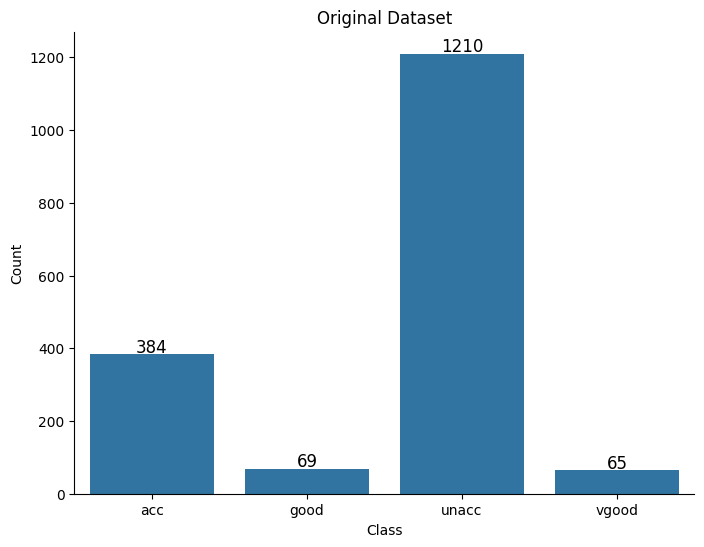

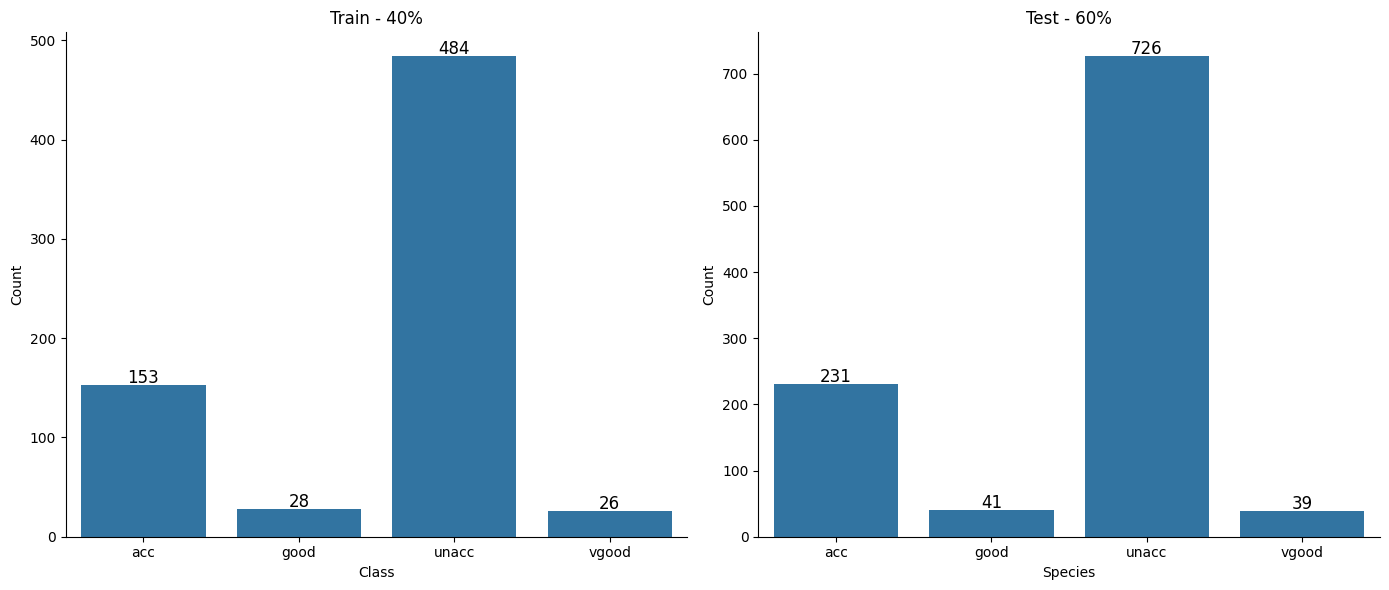

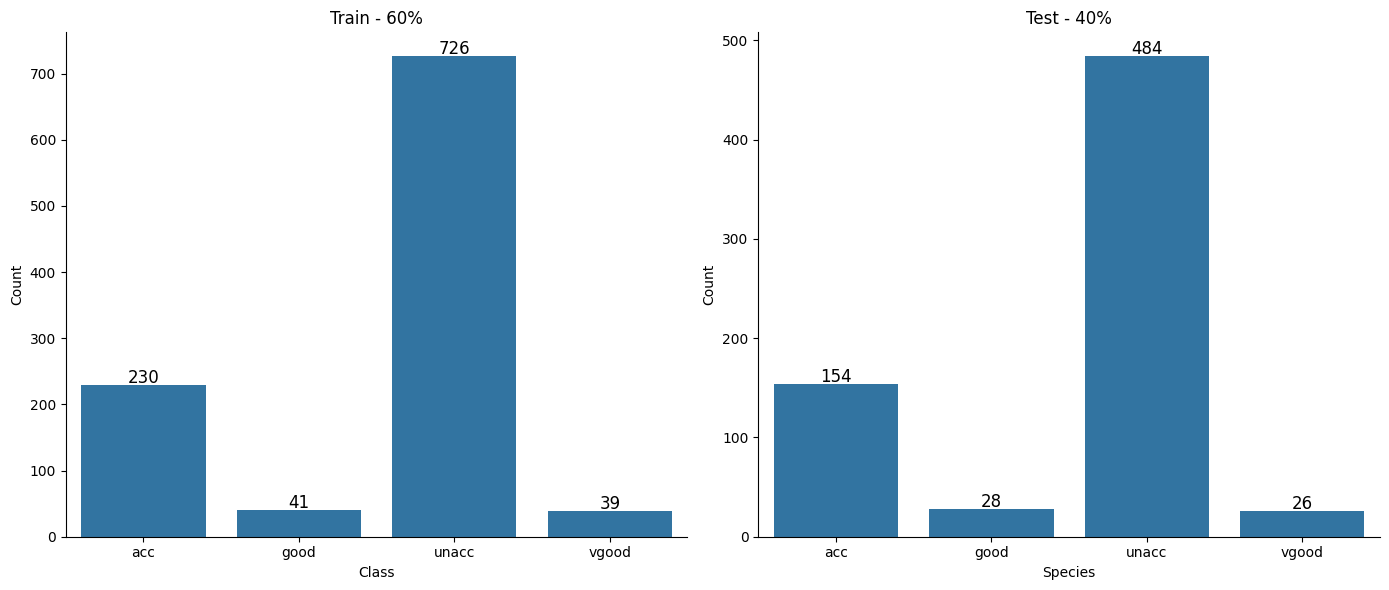

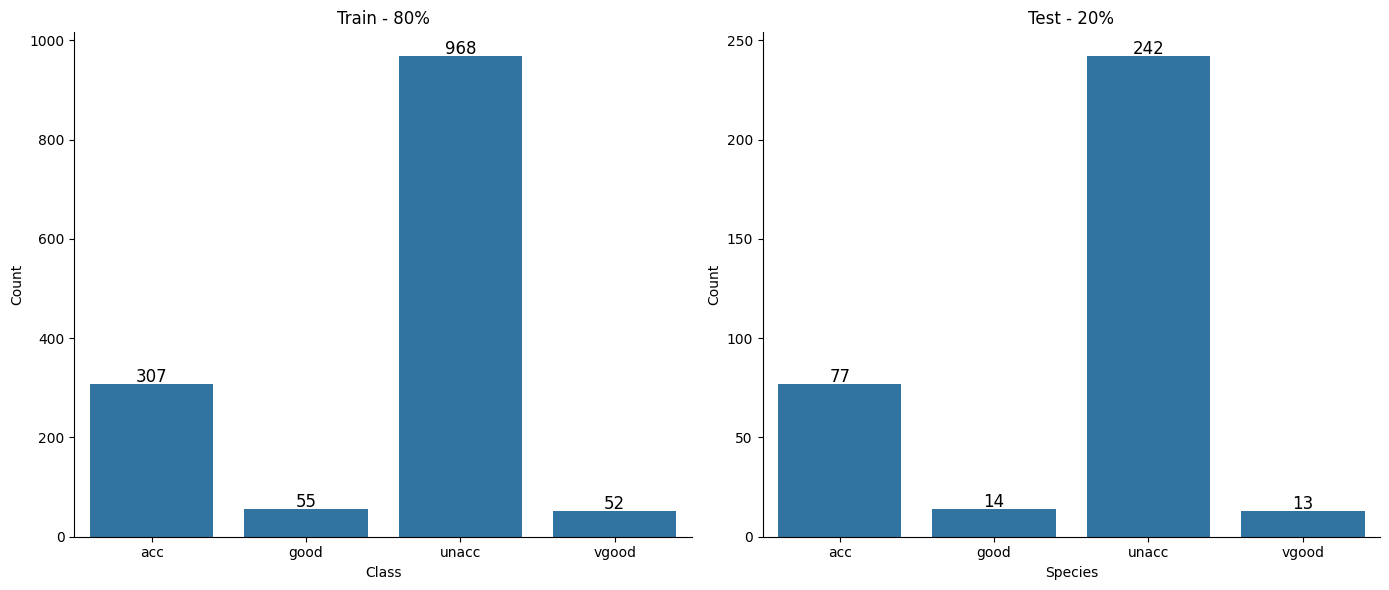

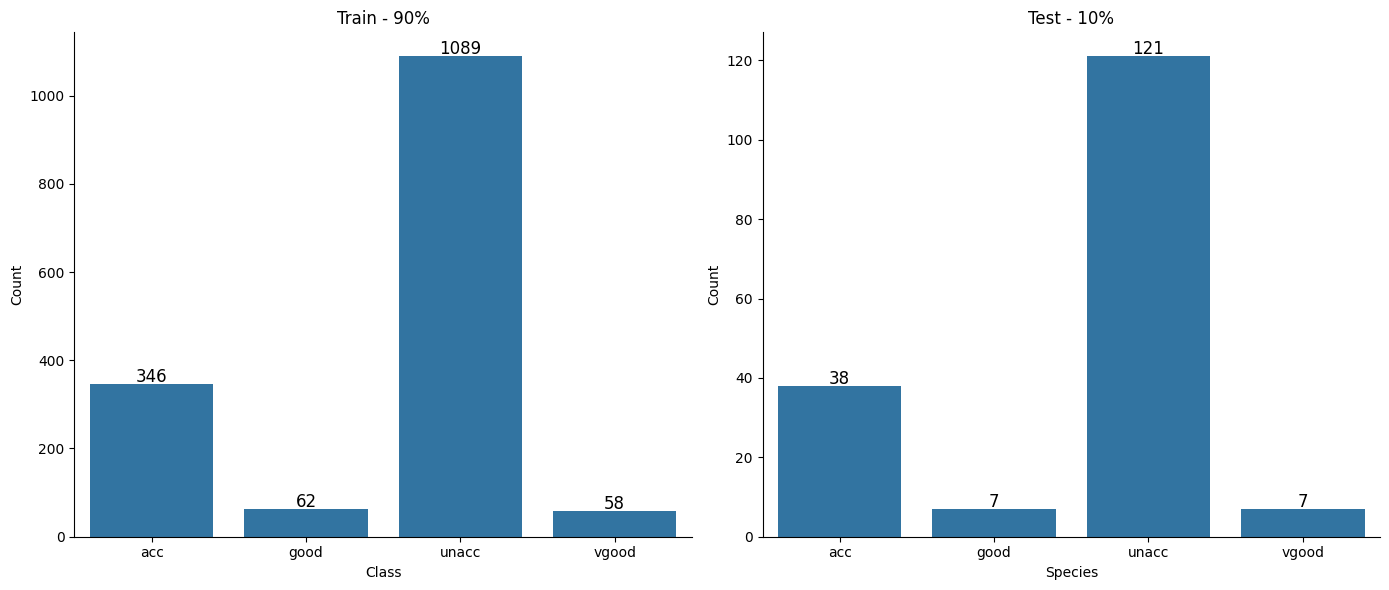

In [5]:
def plot_original_dataset(y, le_class):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=le_class.inverse_transform(y), order=le_class.classes_)
    ax.set_title("Original Dataset")
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")

    # Add counts on top of bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
    # Remove top and right spines
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    plt.show()

# Call the function with original data
plot_original_dataset(y, le_class)

# Create bars
def plot_split_datasets( datasets, le_class):
    
    for split, data in datasets.items():
        # Create figure for each split
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Bar for train dataset
        train_ax = axes[0]
        sns.countplot(x=le_class.inverse_transform(data['label_train']), ax=train_ax, order=le_class.classes_)
        train_ax.set_title(f"Train - {split}%")
        train_ax.set_xlabel("Class")
        train_ax.set_ylabel("Count")

        # Add counts on top of bars
        for p in train_ax.patches:
            train_ax.annotate(f'{p.get_height():.0f}', 
                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                             ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

        # Bar for test dataset
        test_ax = axes[1]
        sns.countplot(x=le_class.inverse_transform(data['label_test']), ax=test_ax, order=le_class.classes_)
        test_ax.set_title(f"Test - {100 - int(split)}%")
        test_ax.set_xlabel("Species")
        test_ax.set_ylabel("Count")

        # Add counts on top of bars
        for p in test_ax.patches:
            test_ax.annotate(f'{p.get_height():.0f}', 
                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                             ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

        # remove top line and right spines
        for spine in ['top', 'right']:
            train_ax.spines[spine].set_visible(False)
            test_ax.spines[spine].set_visible(False)
        
        # Show bar
        plt.tight_layout()
        plt.show()

plot_split_datasets(datasets, le_class)



 Decision Tree for 40% Train / 60% Test


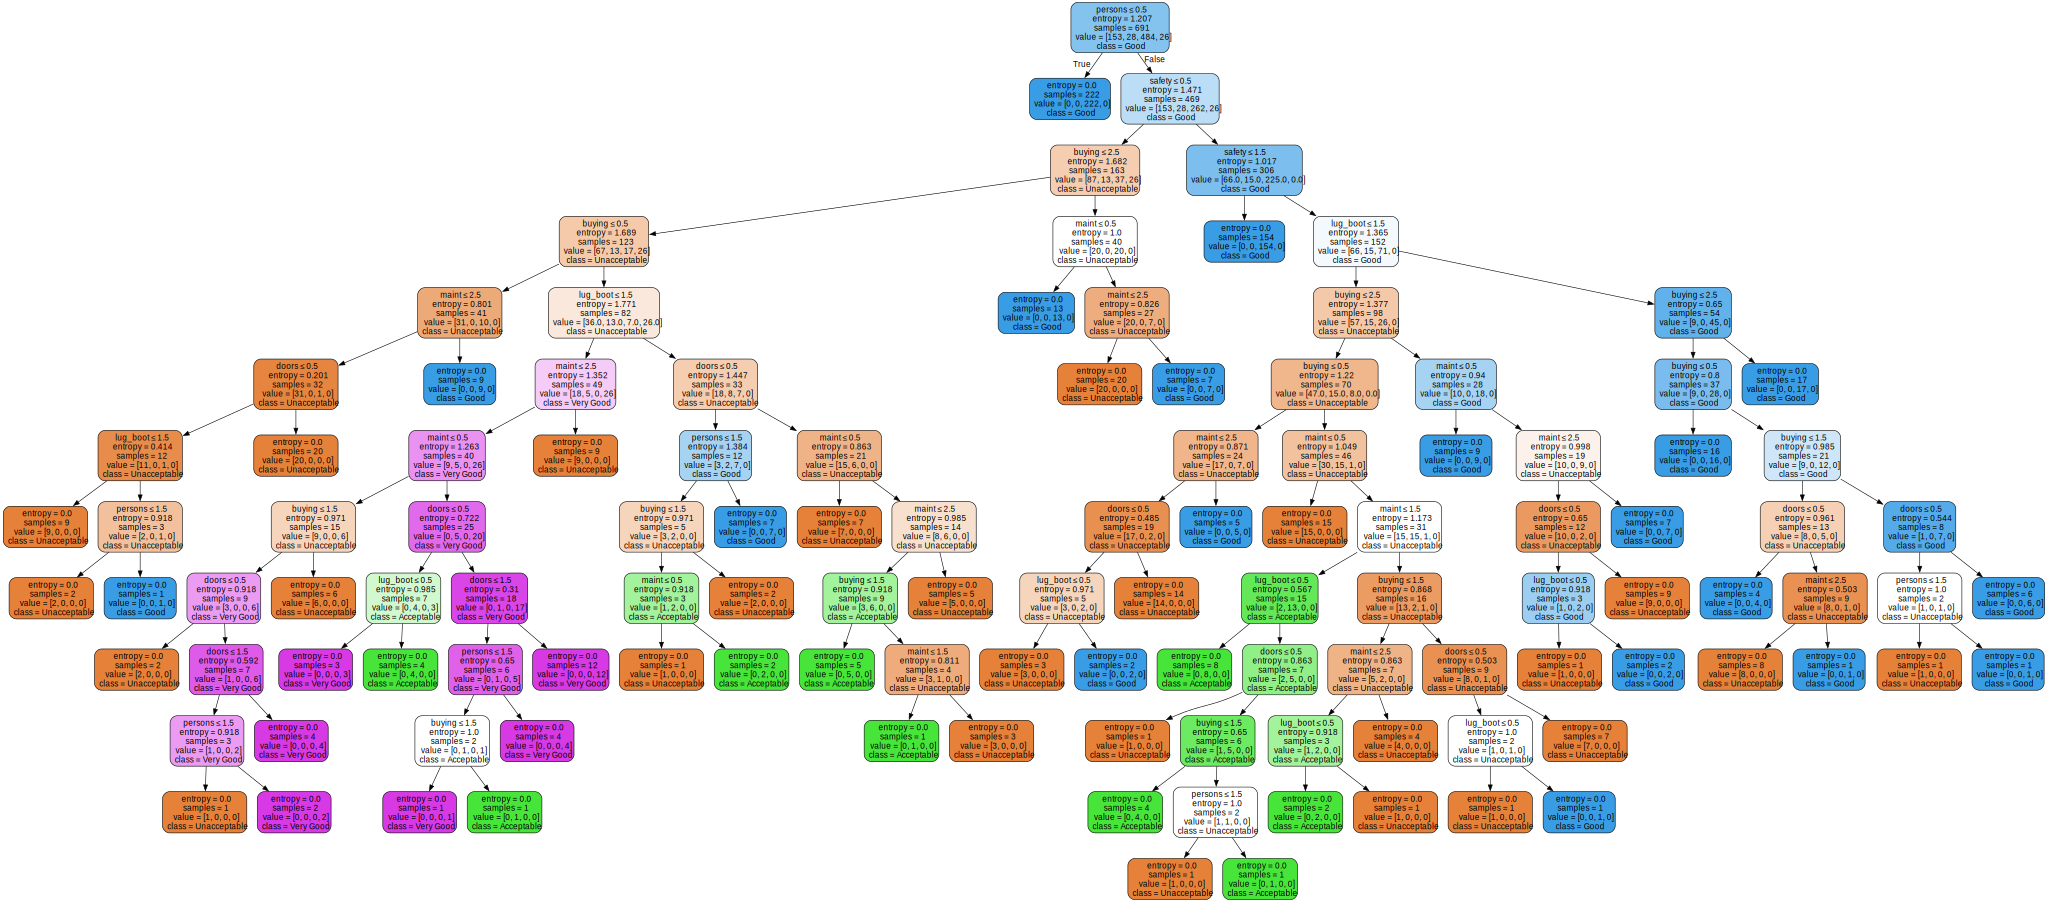


 Decision Tree for 60% Train / 40% Test


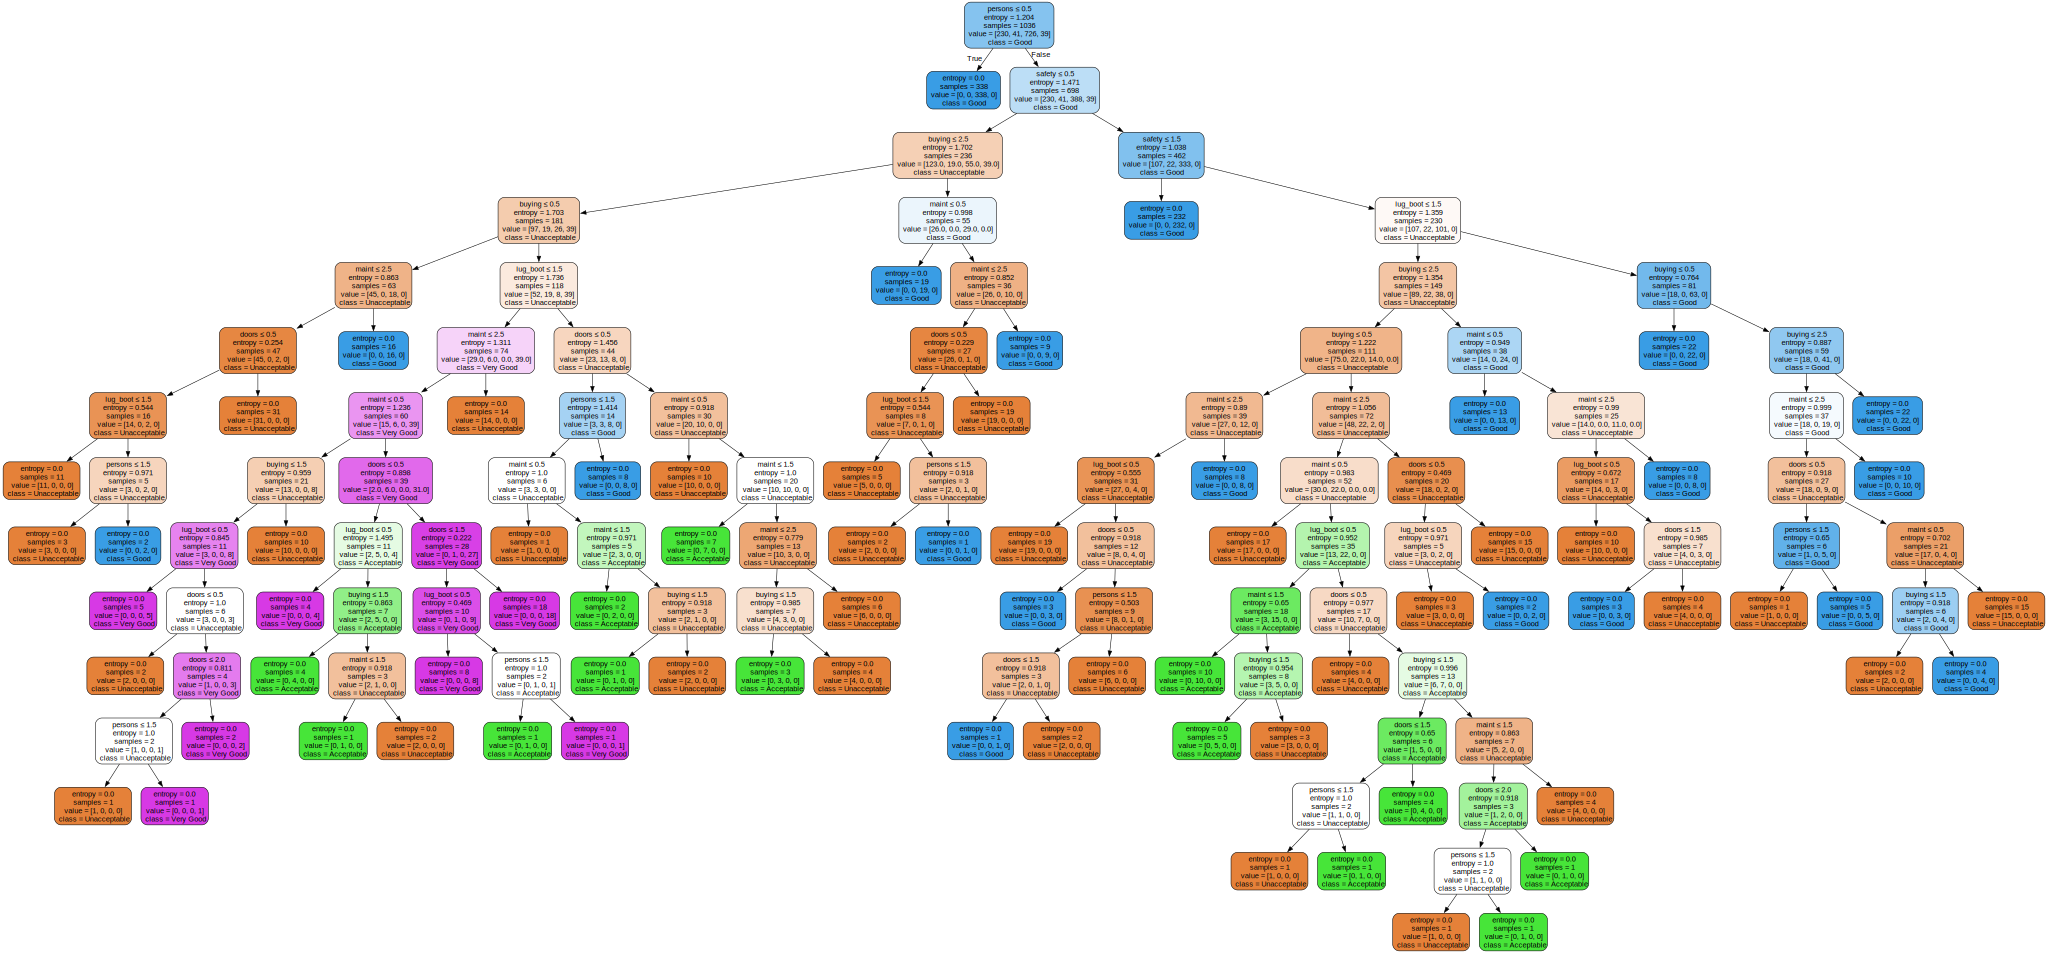


 Decision Tree for 80% Train / 20% Test


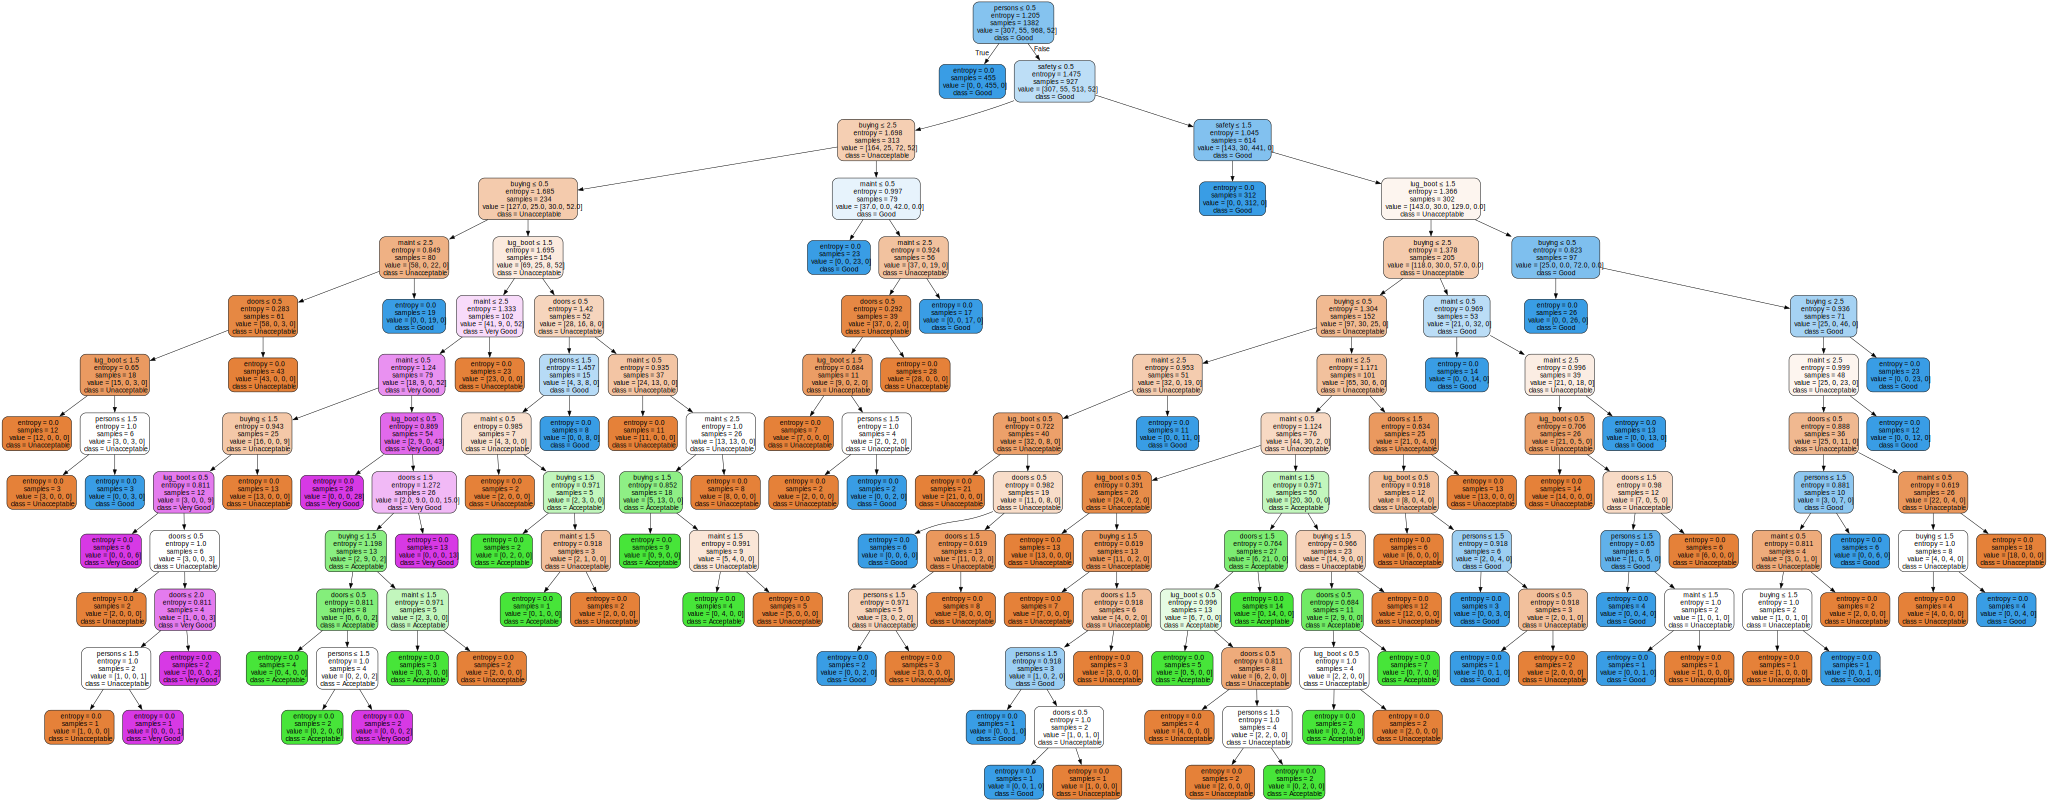


 Decision Tree for 90% Train / 10% Test


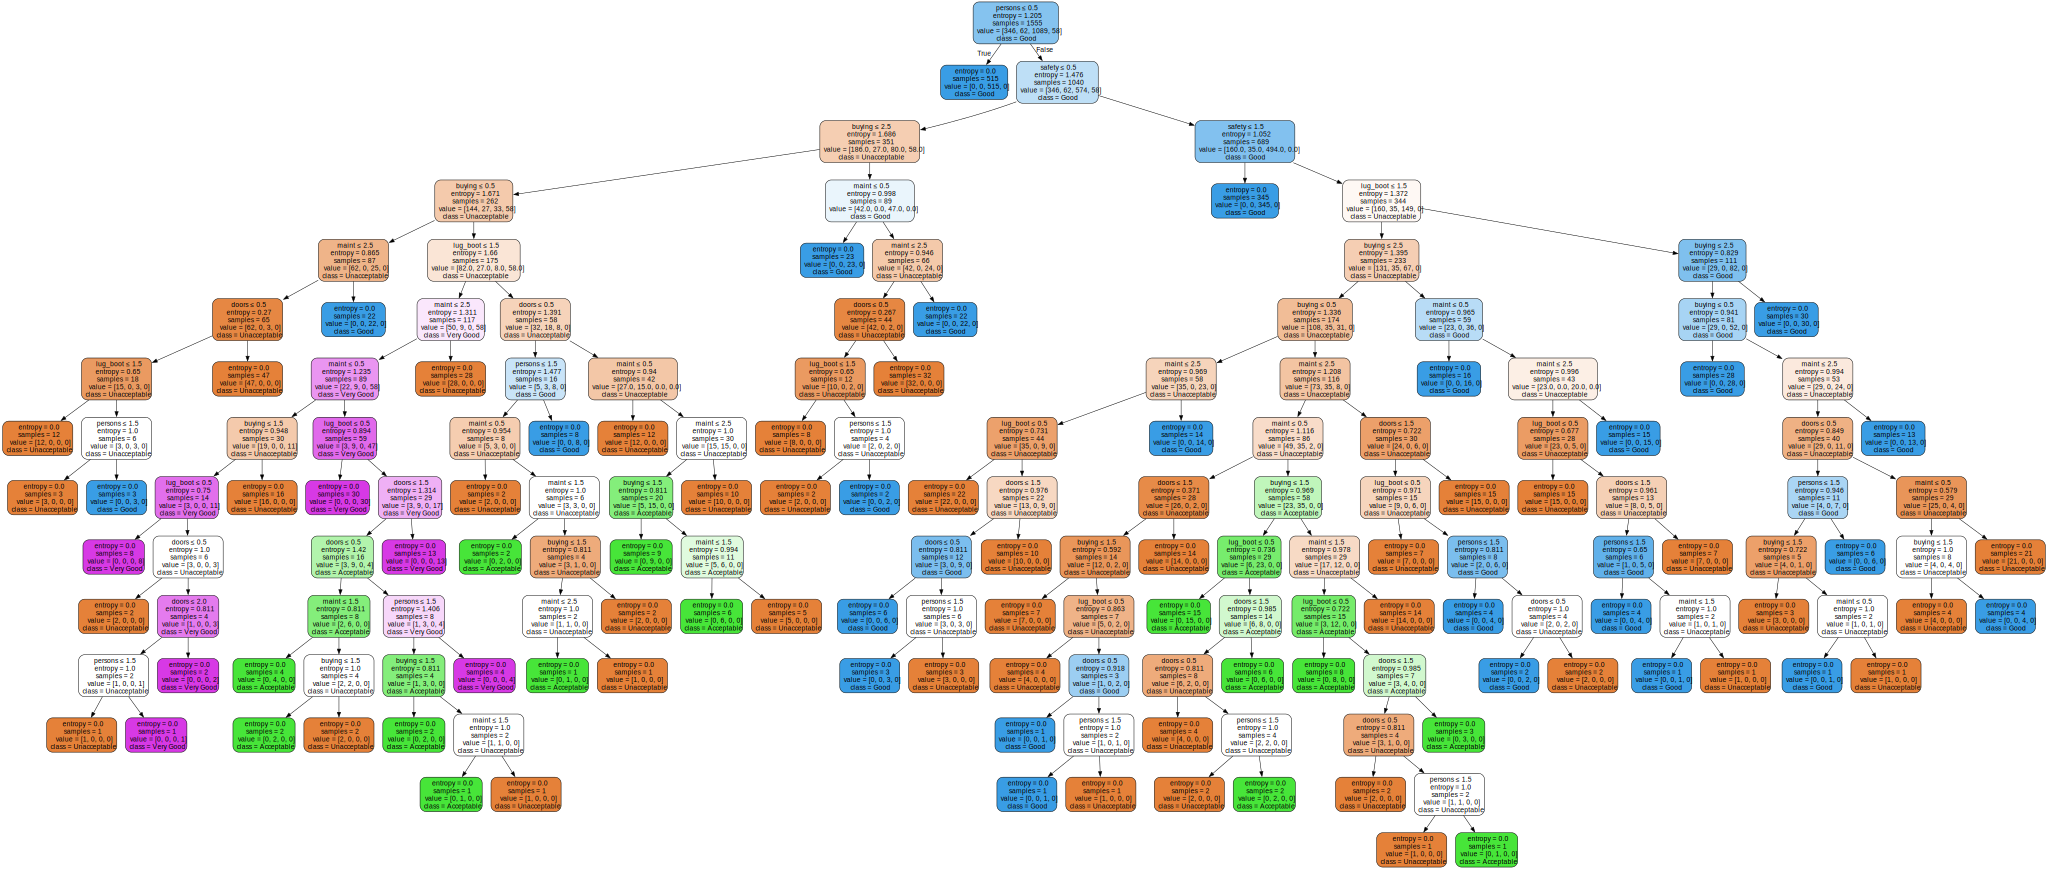

In [6]:
for key, data in datasets.items():
    # Initialize the DecisionTreeClassifier with 'entropy' criterion and a fixed random seed
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    # Train the decision tree classifier using the training features and labels
    clf.fit(data['feature_train'], data['label_train'])

    # Export the trained decision tree as a DOT format string for visualization
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=data['feature_train'].columns,
        class_names=['Unacceptable', 'Acceptable', 'Good', 'Very Good'],
        filled=True, rounded=True,
        special_characters=True
    )
    
    print(f"\n Decision Tree for {key}% Train / {100 - int(key)}% Test")
    display(graphviz.Source(dot_data))

# Decision Tree Classification and Evaluation

This section performs classification using a **Decision Tree** and evaluates its performance on different dataset splits.

### Steps:
1. **Model Training**:
   - A **DecisionTreeClassifier** is initialized with the criterion set to "entropy" and a fixed random seed.
   - The model is trained on the training features (`feature_train`) and labels (`label_train`).

2. **Prediction and Evaluation**:
   - The model makes predictions on the test features (`feature_test`).
   - A **classification report** is printed, showing performance metrics (precision, recall, f1-score) for each class in the test set.

3. **Confusion Matrix**:
   - A **confusion matrix** is computed to compare the true and predicted labels.
   - The confusion matrix is visualized using a **heatmap**, where annotations display the count of true vs. predicted labels.
   - The heatmap is labeled with axis titles and a title indicating the split ratio (train/test).

### Output:
- **Classification Report**: Displays performance metrics for each class.
- **Confusion Matrix**: A heatmap visualizing the true and predicted labels for each dataset split.


 Classification Report for 40% Training Set
              precision    recall  f1-score   support

         acc       0.89      0.90      0.90       231
        good       0.82      0.76      0.78        41
       unacc       0.98      0.98      0.98       726
       vgood       0.94      0.87      0.91        39

    accuracy                           0.95      1037
   macro avg       0.91      0.88      0.89      1037
weighted avg       0.95      0.95      0.95      1037



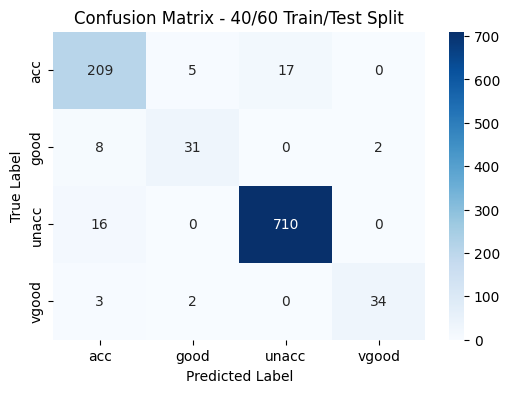


 Classification Report for 60% Training Set
              precision    recall  f1-score   support

         acc       0.95      0.97      0.96       154
        good       0.93      0.96      0.95        28
       unacc       1.00      0.99      0.99       484
       vgood       1.00      0.96      0.98        26

    accuracy                           0.98       692
   macro avg       0.97      0.97      0.97       692
weighted avg       0.98      0.98      0.98       692



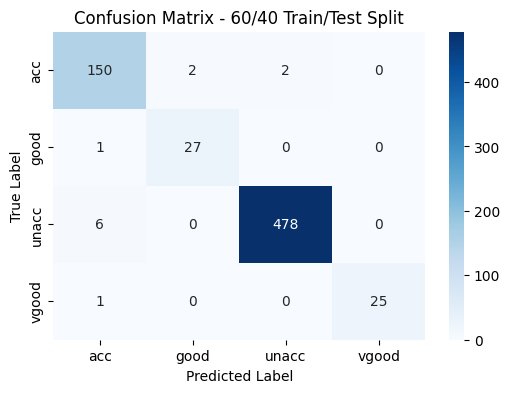


 Classification Report for 80% Training Set
              precision    recall  f1-score   support

         acc       0.96      0.96      0.96        77
        good       0.82      1.00      0.90        14
       unacc       1.00      1.00      1.00       242
       vgood       1.00      0.77      0.87        13

    accuracy                           0.98       346
   macro avg       0.95      0.93      0.93       346
weighted avg       0.98      0.98      0.98       346



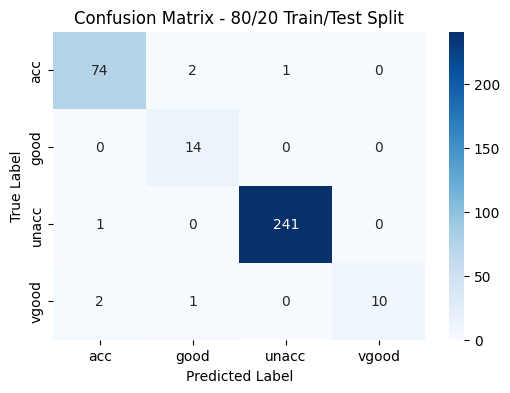


 Classification Report for 90% Training Set
              precision    recall  f1-score   support

         acc       0.95      0.97      0.96        38
        good       1.00      1.00      1.00         7
       unacc       0.99      0.99      0.99       121
       vgood       1.00      0.86      0.92         7

    accuracy                           0.98       173
   macro avg       0.99      0.96      0.97       173
weighted avg       0.98      0.98      0.98       173



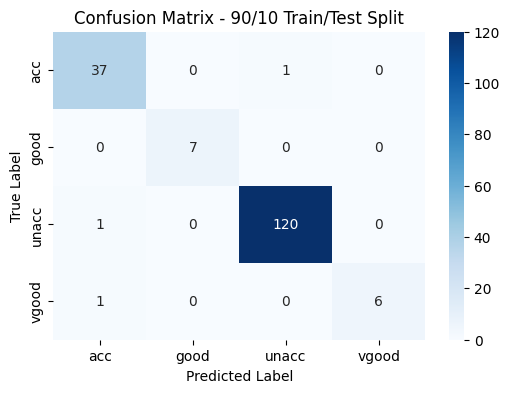

In [7]:
for key, data in datasets.items():

    # Initialize and train a Decision Tree classifier with entropy criterion
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(data['feature_train'], data['label_train'])

    # Make predictions on the test set
    y_pred = clf.predict(data['feature_test'])

    # Print classification report showing precision
    print(f"\n Classification Report for {key}% Training Set")
    print(classification_report(data['label_test'], y_pred, target_names=le_class.classes_))

    # Compute the confusion matrix comparing true labels with predicted labels
    cm = confusion_matrix(data['label_test'], y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le_class.classes_, yticklabels=le_class.classes_)
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {key}/{100 - int(key)} Train/Test Split")
    plt.show()

# Decision Tree Classifier with Varying Depths

This script evaluates the performance of a **Decision Tree Classifier** with different tree depths and visualizes the resulting decision trees.

### Steps:
1. **Dataset Split**: Split the data into training and test sets (80/20), ensuring class distribution with `stratify=y`.
2. **Training and Evaluation**: Train the model with various depths (`None, 2, 3, 4, 5, 6, 7`), compute accuracy for each depth, and store it in `accuracies`.
3. **Tree Visualization**: Export each tree’s structure as a DOT file and visualize it using `graphviz`.

### Output:
- **Accuracy** for each tree depth.
- **Visualized Decision Trees** with depth labels to understand how the tree splits data.

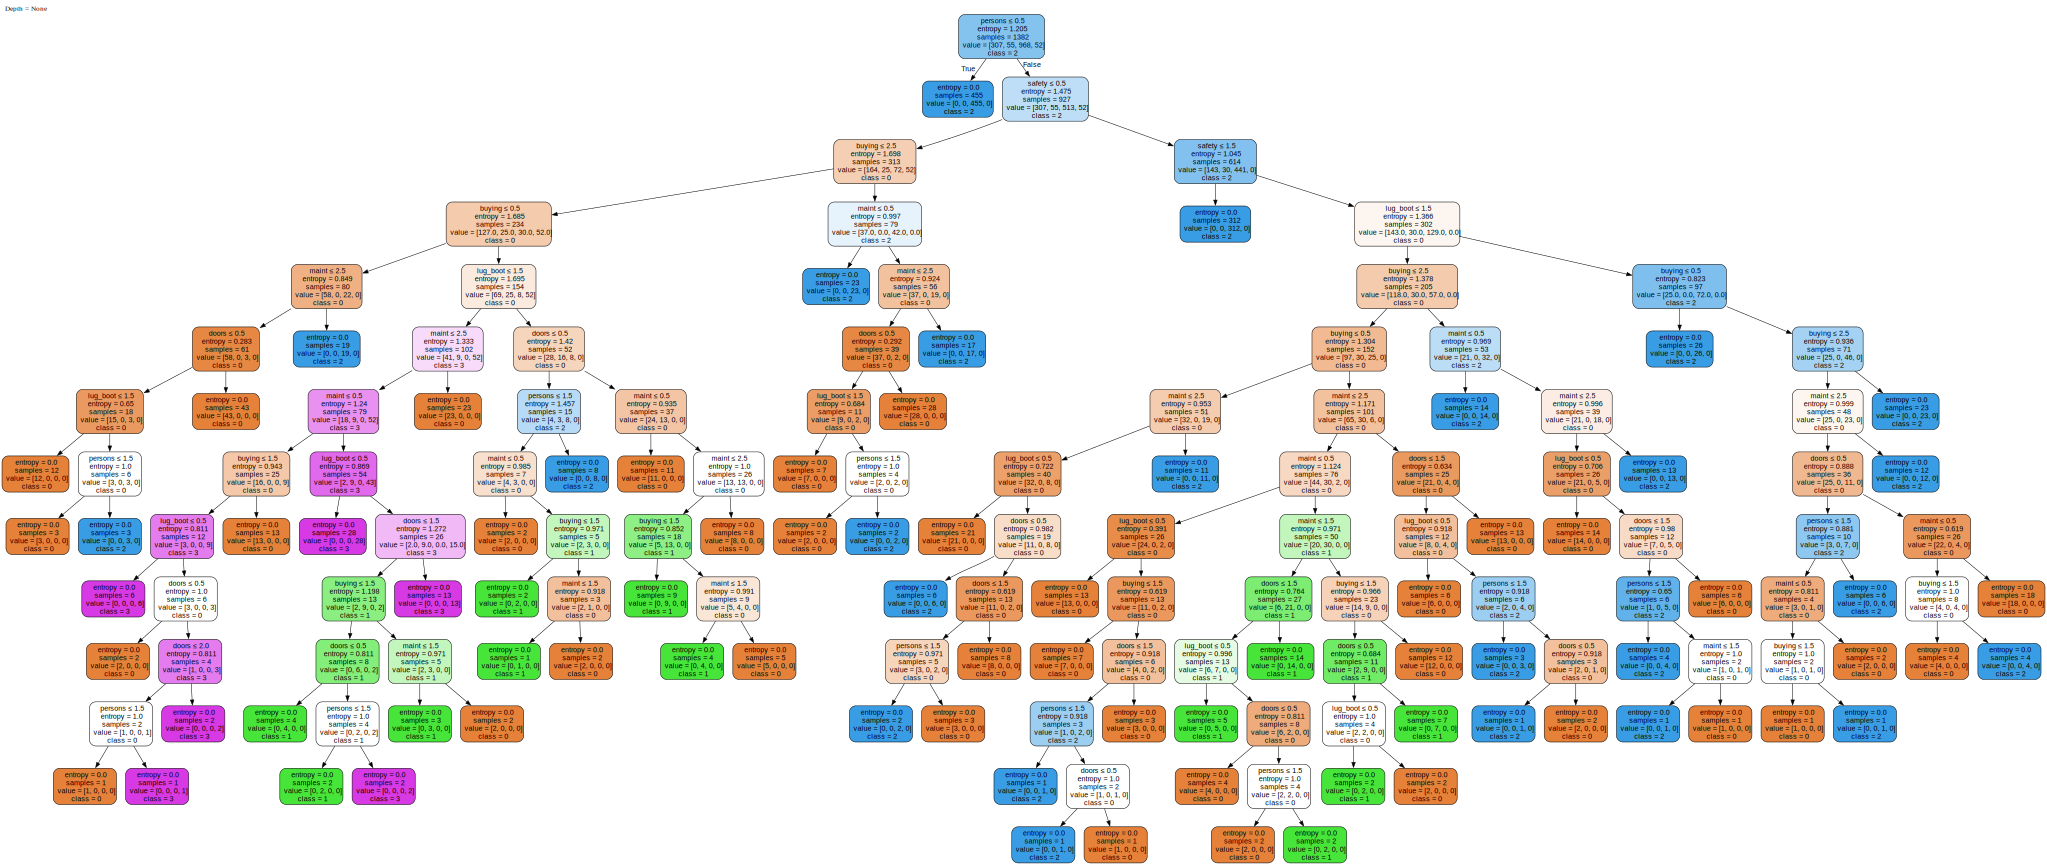

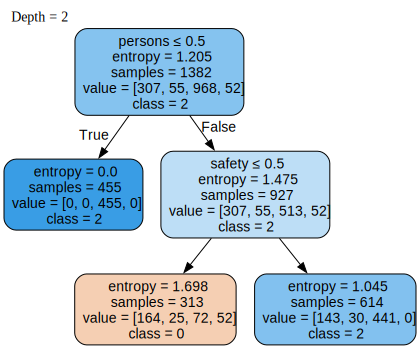

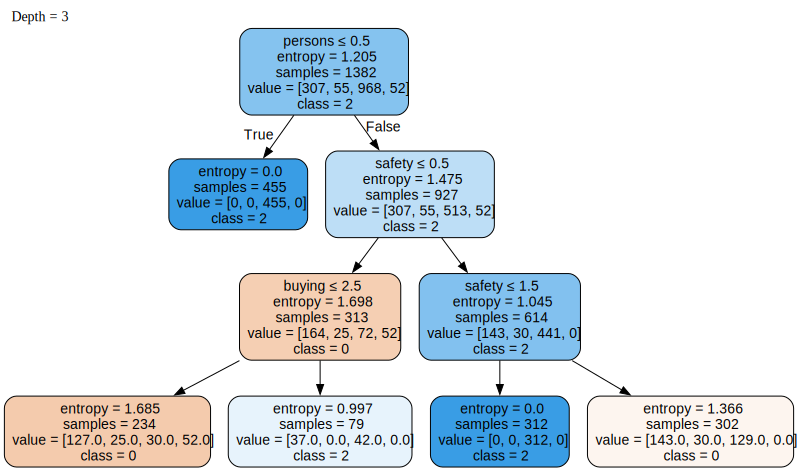

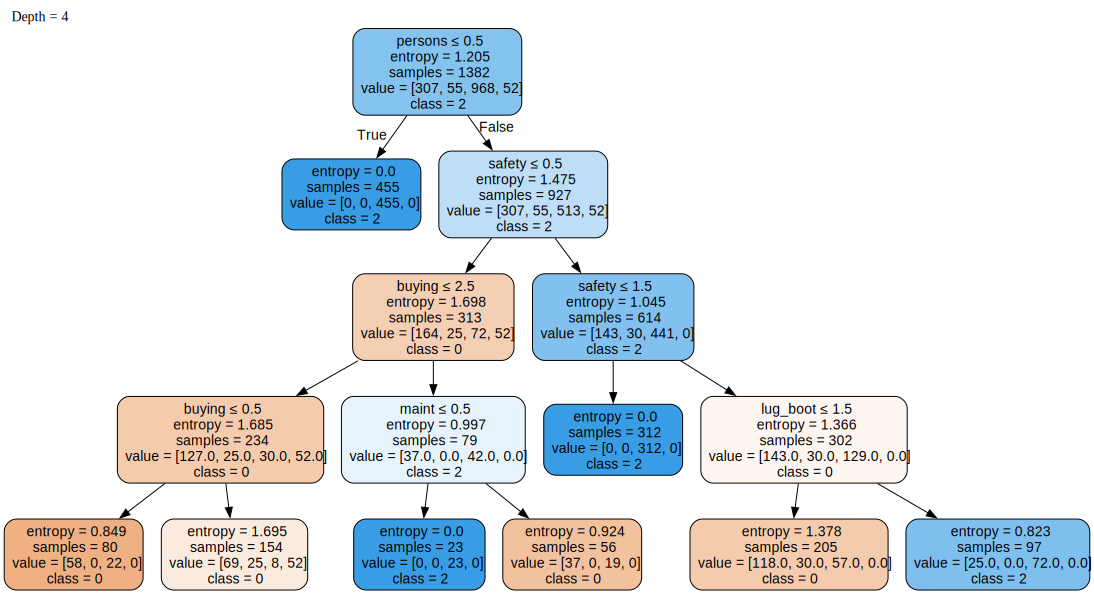

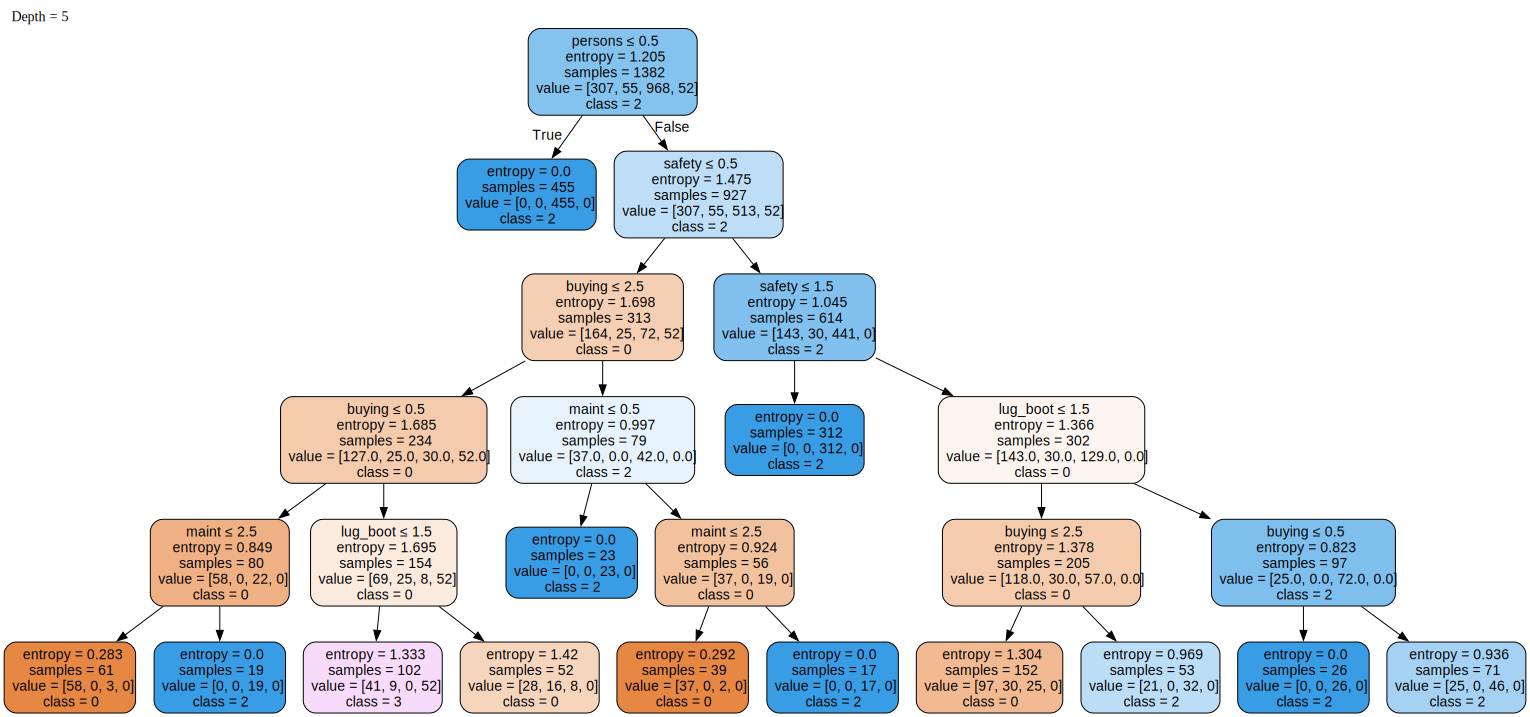

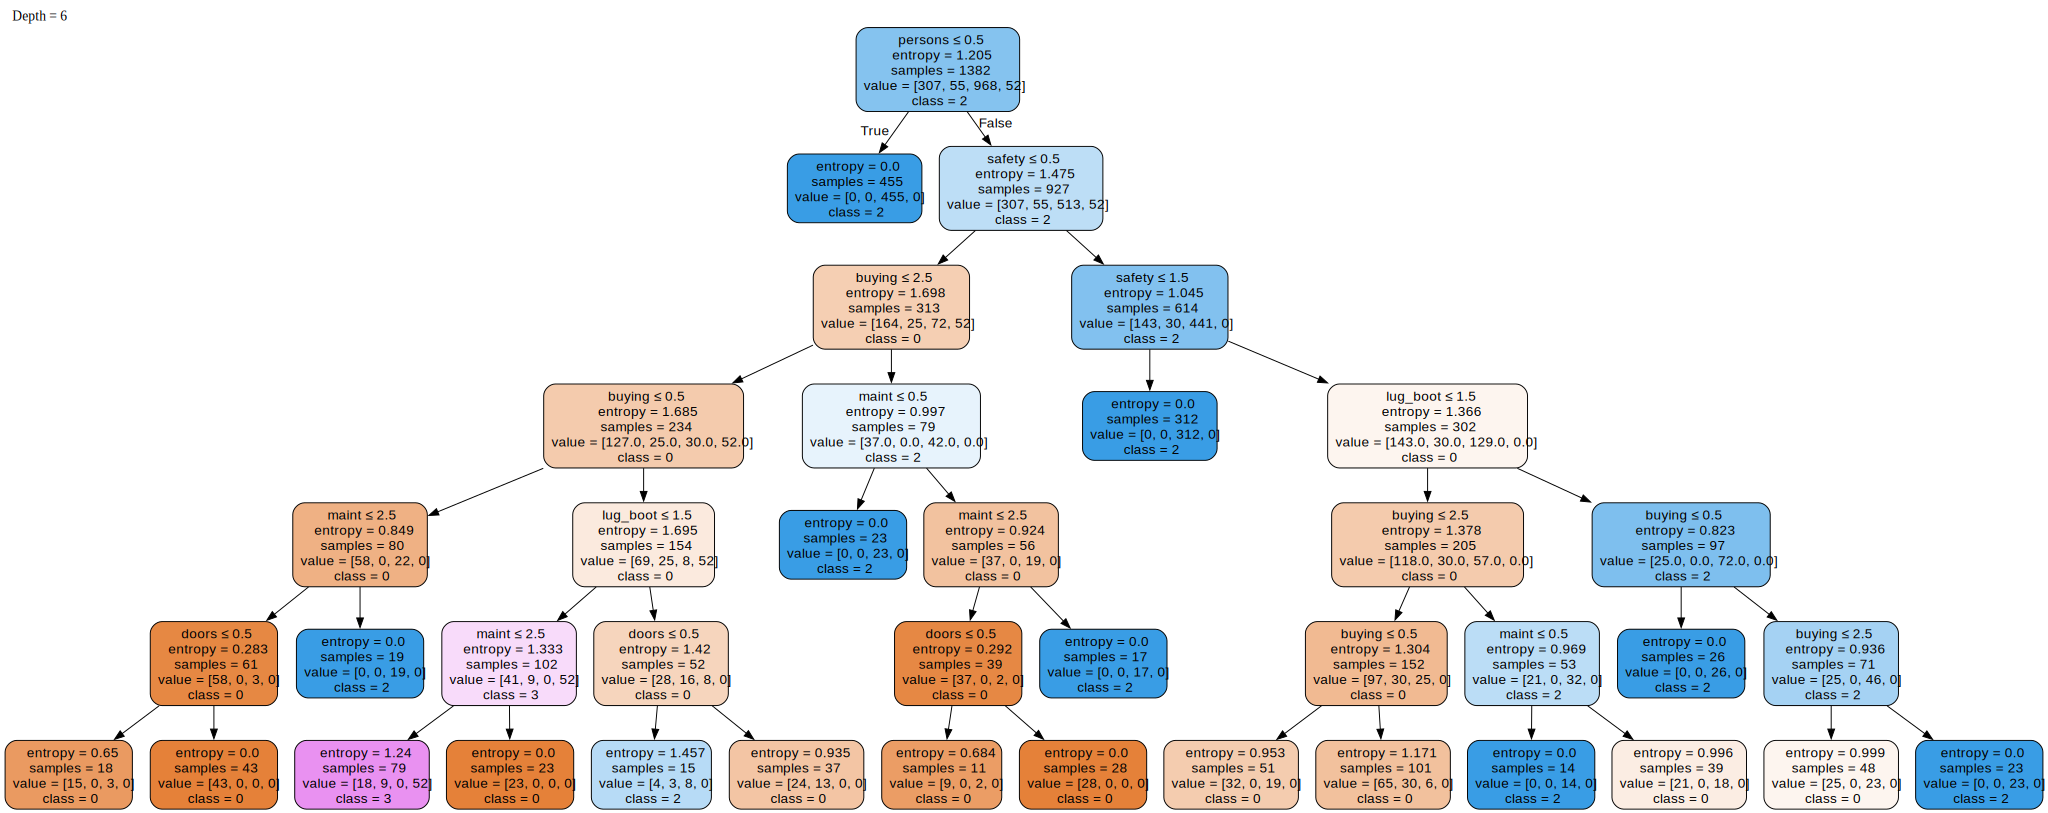

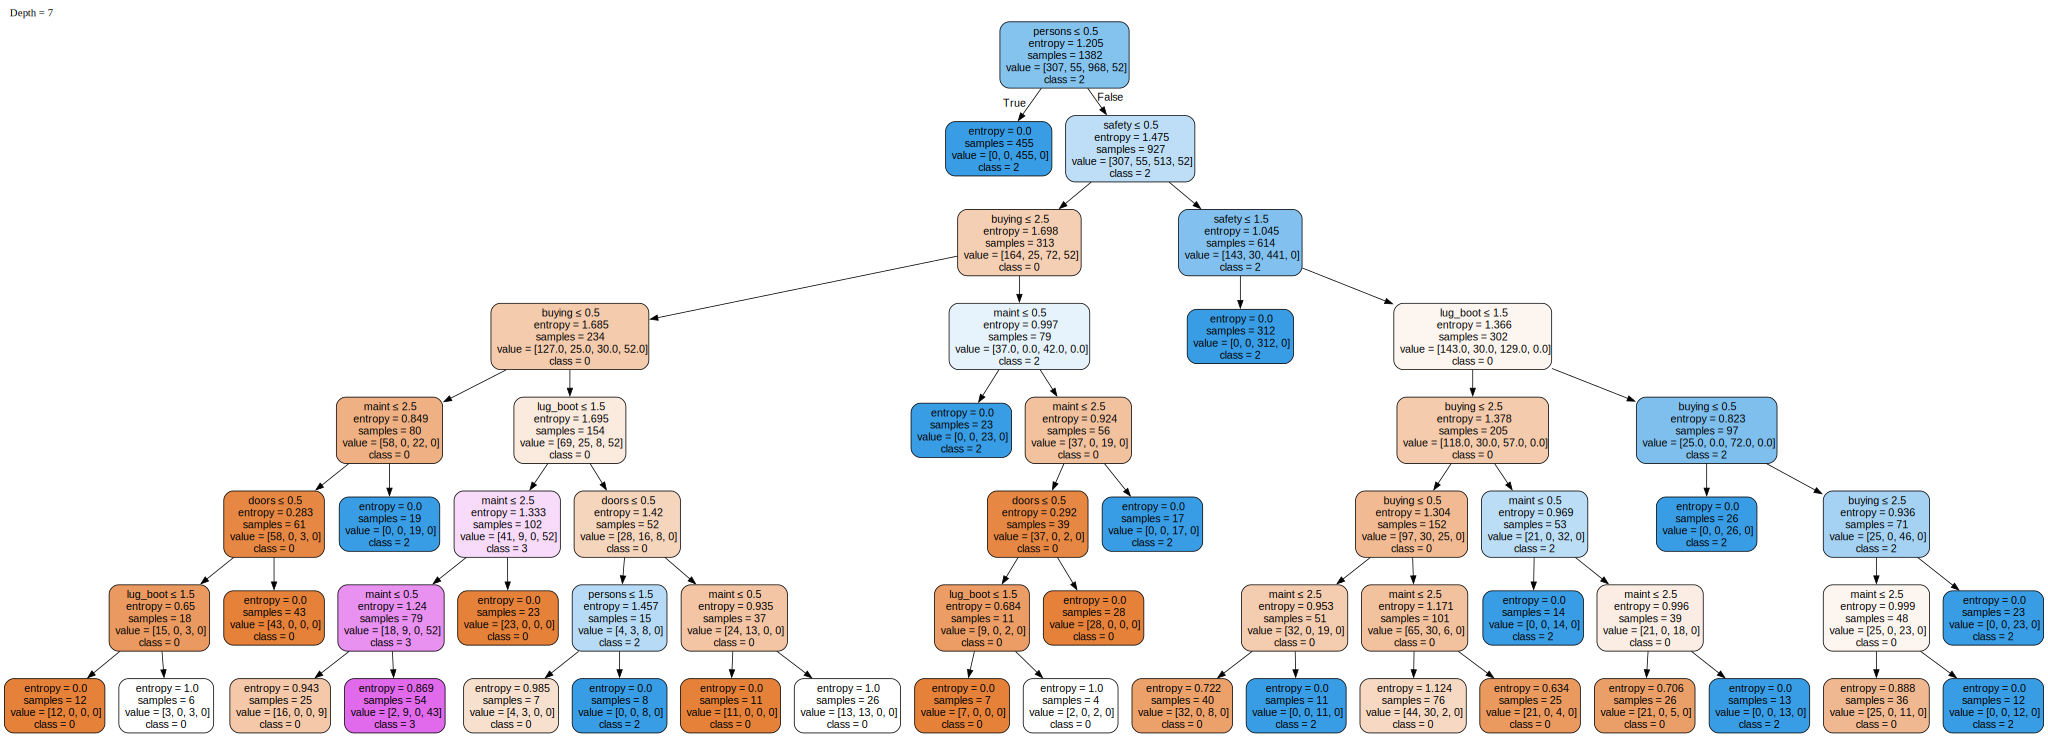

In [8]:

depths = [None, 2, 3, 4, 5, 6, 7]

# List to store accuracy values for each depth
accuracies = []

# Split the dataset into training and test sets (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Loop through each depth in the list to train and evaluate the model
for d in depths:

    # Initialize and train the DecisionTreeClassifier with the current depth
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the model and append it to the accuracies list
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    class_names = [str(label) for label in clf.classes_]

    # Export the trained decision tree to DOT format for visualization
    dot_data = export_graphviz(clf, out_file=None,
                               feature_names=X.columns,
                               class_names=class_names,
                               filled=True, rounded=True, special_characters=True)
    
    # Add a label indicating the current depth to the tree diagram
    depth_label = f"Depth = {d}" if d is not None else "Depth = None"
    lines = dot_data.split('\n')
    lines.insert(1, f'label="{depth_label}"; labelloc=top; labeljust=left;')
    dot_data = '\n'.join(lines) 

    # Generate and display the decision tree graph
    graph = graphviz.Source(dot_data)
    display(graph)



# Accuracy vs Max Depth Visualization

This code creates a table and a plot to evaluate the accuracy of the **Decision Tree Classifier** at different maximum depths.
1. **Result Table**:
   - A pandas DataFrame (`df_acc`) is created to display the maximum depths alongside their corresponding accuracies.
   - The table is printed without the index for easy reading.

2. **Accuracy Calculation**:
   - The accuracies for each tree depth are stored in a dictionary (`accuracy_results`).

3. **Plotting**:
   - A line plot is generated to show the relationship between the maximum depth and accuracy, with markers and a blue line.
   - The plot includes titles for the x and y axes, and grid lines are enabled for clarity.

max_depth  Accuracy
     None  0.979769
        2  0.777457
        3  0.777457
        4  0.815029
        5  0.852601
        6  0.890173
        7  0.924855


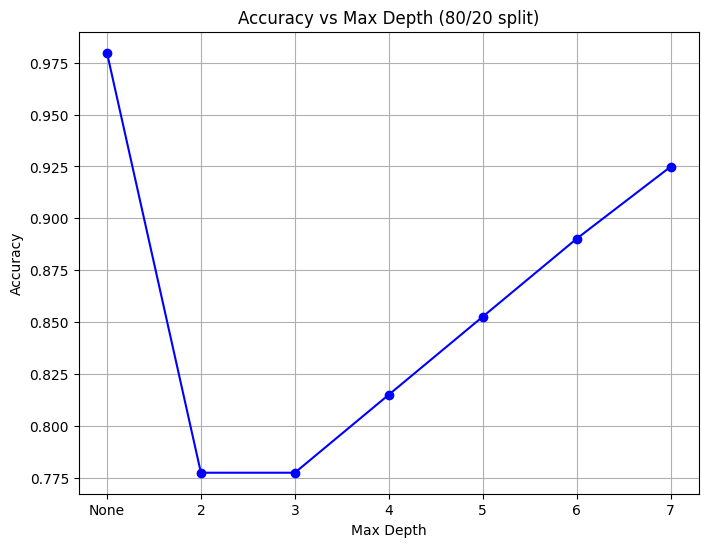

In [9]:
# Result table
df_acc = pd.DataFrame({
    'max_depth': [str(d) for d in depths],
    'Accuracy': accuracies
})
print(df_acc.to_string(index=False))

# Create a dictionary mapping max depth to accuracy and plot the accuracy vs max depth 
accuracy_results = dict(zip(depths, accuracies))
plt.figure(figsize=(8, 6))
plt.plot([str(d) for d in depths], accuracies, marker='o', linestyle='-', color='b')

# add titles for axies
plt.title("Accuracy vs Max Depth (80/20 split)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

plt.grid(True)

plt.show()